In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%%time
df_withoutduplicatefeatures4 = pd.read_csv("df_withoutduplicatefeatures4.csv",
              sep="\t", encoding="utf-8", low_memory=False)

In [ ]:
df = df_withoutduplicatefeatures4

In [38]:
col_names=[]
for x in df.columns:
    col_names.append(x)

In [39]:
for i in range(len(df.columns)) :
    print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
url  :  object
product_name  :  object
abbreviated_product_name  :  object
generic_name  :  object
packaging_en  :  object
packaging_text  :  object
brands  :  object
categories_en  :  object
origins_en  :  object
manufacturing_places  :  object
labels_en  :  object
emb_codes  :  object
first_packaging_code_geo  :  object
cities_tags  :  object
purchase_places  :  object
stores  :  object
countries_en  :  object
ingredients_text  :  object
ingredients_analysis_tags  :  object
allergens  :  object
traces_en  :  object
serving_size  :  object
serving_quantity  :  float64
no_nutrition_data  :  object
additives_n  :  float64
additives_en  :  object
nutriscore_grade  :  object
nova_group  :  float64
pnns_groups_1  :  object
pnns_groups_2  :  object
food_groups_en  :  object
states_en  :  object
brand_owner  :  object
ecoscore_grade  :  object
nutrient_levels_tags  :  object
product_quantity  :  float64
owner  :  object
data_quality_errors_tags  :  object
popularity_tags  :  

In [1]:
index=0
for i in (df.loc[10]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

NameError: name 'df' is not defined

### Suppression autres features redondantes ou inutiles

In [ ]:
cols_to_drop = ['energy-kj_100g', 'nutriscore_score', 'ecoscore_score',
               'nutrition-score-fr_100g', 'nutrition-score-uk_100g',
               'unique_scans_n', 'completeness', 'quantity']
def drop_columns(df, cols_to_drop):
    """
    Drop columns from a pandas DataFrame.

    Parameters:
        df (pandas DataFrame): The DataFrame to drop columns from.
        cols_to_drop (list): A list of column names to drop from the DataFrame.

    Returns:
        pandas DataFrame: The modified DataFrame with the specified columns dropped.
    """
    return df.drop(columns=cols_to_drop)

In [ ]:
df = drop_columns(df, cols_to_drop)

### Suppression ligne en doublon, où product_name sont null

In [ ]:
df = df.drop_duplicates()
df.shape

In [ ]:
df = df.dropna(subset=['product_name'])
df.shape

### Suppression outliers des col _100g
Les features suffixées avec _100g indiquent la quantité de nutriment pour 100g de produit. Les valeurs < 0 ou > 100 sont donc abbérantes. Les lignes où au moins une des features n'est pas dans [0;100] sont supprimées. 
Sauf les features qui ont des unités différentes : energy-kj_100g, energy-kcal_100g, 'energy_100g', 'energy-from-fat_100g',  ph_100g, carbon-footprint_100g, carbon-footprint-from-meat-or-fish_100g, nutrition-score-fr_100g, nutrition-score-uk_100g

In [ ]:
g_per_100g_features = ['fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 
                       'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 
                       'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 
                       'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 
                       'melissic-acid_100g', 'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 
                       'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 
                       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 
                       'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 
                       'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 
                       'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 
                       'added-sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g', 
                       'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'erythritol_100g', 'fiber_100g', 
                       'soluble-fiber_100g', 'insoluble-fiber_100g', 'proteins_100g', 'casein_100g', 'serum-proteins_100g', 
                       'nucleotides_100g', 'salt_100g', 'added-salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 
                       'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 
                       'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 
                       'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 
                       'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 
                       'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'fluoride_100g', 
                       'selenium_100g', 'chromium_100g', 'molybdenum_100g', 'iodine_100g', 'caffeine_100g', 
                       'taurine_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g', 
                       'fruits-vegetables-nuts-estimate_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 
                       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'glycemic-index_100g', 
                       'water-hardness_100g', 'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g', 
                       'carnitine_100g']

In [23]:
from def_outliers import outliers_nutrimentscols, handle_outliers, outliers_nutrimentscols_others

In [ ]:
df = outliers_nutrimentscols(df, g_per_100g_features)

Les graisses saturées ne peuvent pas être supérieures au total de graisse, de même pour le sodium avec le sel, le sucre ajoutée avec le sucre, le sucre avec les glucides. L'énergie max en kJ/g ne peut pas être > 37 et kcal/g ne peut pas être> 9. Le ph se situe entre 0 et 14. Donc suppression des lignes si elles ne respectent pas ces conditions.

In [ ]:
def outliers_nutrimentscols_others(df):
    """
    Filters a DataFrame based on certain conditions.

    This function removes rows where values from some columns that
    cannot be greater than other columns.

    Parameters:
        df (pandas.DataFrame): The DataFrame to be filtered.

    Returns:
        pandas.DataFrame: The filtered DataFrame.
    """
    # Delete rows where the nutrient type value cannot be greater than the nutrient total.
    df = df[~(df['saturated-fat_100g'] > df['fat_100g'])
            | (df['sodium_100g'] > df['salt_100g'])
            | (df['added-sugars_100g'] > df['sugars_100g'])
            | (df['sugars_100g'] > df['carbohydrates_100g'])]
    
    # Delete outliers from others nutrients cols with different unit
    df = df[~(df['energy_100g'] > 3700)]
    df = df[~(df['energy-from-fat_100g'] > 3700)]
    df = df[~(df['energy-kcal_100g'] > 900)]
    df = df[~((df['ph_100g'] < 0) | (df['ph_100g'] > 14))]
    
    return df

In [ ]:
df = outliers_nutrimentscols_others(df)

In [ ]:
df.to_csv("df_after100g.csv", sep='\t', encoding='utf-8', index=False)

In [3]:
%%time
df_after100g = pd.read_csv("df_after100g.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 3min 44s
Wall time: 18min 21s


In [28]:
df = df_after100g

In [10]:
pd.set_option('display.max_columns', None)  

In [29]:
df.shape

(2704153, 157)

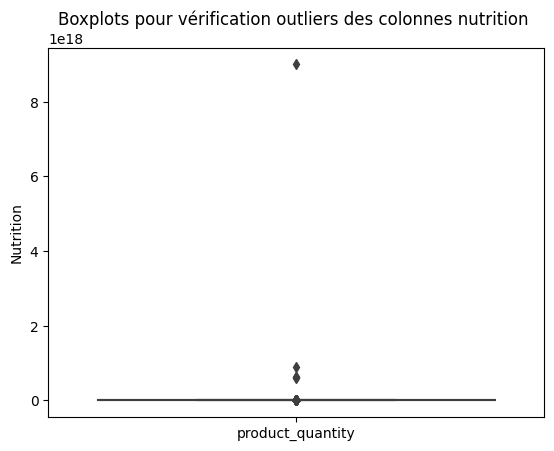

In [12]:
ax3 = sns.boxplot(df.loc[:,['product_quantity']]);
ax3.set_ylabel("Nutrition");
ax3.set_title("Boxplots pour vérification outliers des colonnes nutrition ");

### Outliers des cols sans _100g

outliers : 'serving_quantity', 'product_quantity', 
<br>
pas outliers : 'additives_n', 'nova_group', 

In [27]:

def handle_outliers(df: pd.DataFrame, how: str = 'standard', numeric_cols: list = None, remove_outliers: bool = False) -> pd.DataFrame:
    """
    This function takes a pandas DataFrame as input and returns a cleaned DataFrame
    with the outliers handled according to the specified method.

    Parameters:
    -----------
    dataset : pandas.DataFrame
        The input dataset.
    how : str, optional (default='standard')
        The method to handle outliers. Possible values are:
        - 'standard': Remove observations with values outside the range Q1-1.5IQR and Q3+1.5IQR.
        - 'winsorize': Winsorize the outliers by replacing them with the nearest non-outlier value.
    numeric_cols : list, optional (default=['energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g'])
        The list of numeric columns to handle outliers.
    remove_outliers : bool, optional (default=False)
        Whether to remove outliers from the dataset or not. If True, the outliers will be removed and the cleaned dataset
        without outliers will be returned. If False, the original dataset with outliers handled according to the specified
        method will be returned.

    Returns:
    --------
    pandas.DataFrame
        The cleaned dataset with outliers handled.
    """
    # Set default columns for scaling if not provided
    if numeric_cols is None:
        numeric_cols = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g']

    # Replace missing values with the mean of each column
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    if how == 'standard':
        # Calculate quartiles for each numeric column
        Q1 = df[numeric_cols].quantile(0.25)
        Q3 = df[numeric_cols].quantile(0.75)
        IQR = Q3 - Q1

        # Identify observations with a value outside the range Q1-IQR and Q3+IQR
        outliers = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
        if remove_outliers:
            return outliers
        else:
            # Replace outliers with NaN
            df[numeric_cols] = df[numeric_cols].mask((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
            return df
    elif how == 'winsorize':
        # Winsorize outliers for each numeric column
        for col in numeric_cols:
            q_low = df[col].quantile(0.01)
            q_high = df[col].quantile(0.99)
            if remove_outliers:
                df = df[(df[col] >= q_low) & (df[col] <= q_high)]
            else:
                df[col] = df[col]
        return df

In [30]:
df = handle_outliers(df, how = 'winsorize', numeric_cols=['serving_quantity','product_quantity'], remove_outliers=True)
df.shape

(2601610, 157)

In [31]:
df

,code,url,product_name,abbreviated_product_name,generic_name,packaging_en,packaging_text,brands,categories_en,origins_en,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,ingredients_analysis_tags,allergens,traces_en,serving_size,serving_quantity,no_nutrition_data,additives_n,additives_en,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups_en,states_en,brand_owner,ecoscore_grade,nutrient_levels_tags,product_quantity,owner,data_quality_errors_tags,popularity_tags,main_category_en,image_small_url,image_ingredients_small_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,jeunes pousses,NaN,NaN,NaN,NaN,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,"To be completed,Nutrition facts to be complete...",NaN,unknown,NaN,283.495231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,Andrè,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,"To be completed,Nutrition facts completed,Ingr...",NaN,unknown,NaN,283.495231,NaN,en:energy-value-in-kcal-does-not-match-value-c...,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,165.000000,690.0,NaN,2.00000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Check cols non numériques

In [32]:
for i in range(len(df.columns)):
    if df.dtypes[i] == 'object':  # Vérifie si le type de données de la colonne n'est pas "object"
        print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
url  :  object
product_name  :  object
abbreviated_product_name  :  object
generic_name  :  object
packaging_en  :  object
packaging_text  :  object
brands  :  object
categories_en  :  object
origins_en  :  object
manufacturing_places  :  object
labels_en  :  object
emb_codes  :  object
first_packaging_code_geo  :  object
cities_tags  :  object
purchase_places  :  object
stores  :  object
countries_en  :  object
ingredients_text  :  object
ingredients_analysis_tags  :  object
allergens  :  object
traces_en  :  object
serving_size  :  object
no_nutrition_data  :  object
additives_en  :  object
nutriscore_grade  :  object
pnns_groups_1  :  object
pnns_groups_2  :  object
food_groups_en  :  object
states_en  :  object
brand_owner  :  object
ecoscore_grade  :  object
nutrient_levels_tags  :  object
owner  :  object
data_quality_errors_tags  :  object
popularity_tags  :  object
main_category_en  :  object
image_small_url  :  object
image_ingredients_small_url  :  object
imag

In [33]:
df.select_dtypes(exclude=['number'])

,code,url,product_name,abbreviated_product_name,generic_name,packaging_en,packaging_text,brands,categories_en,origins_en,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,ingredients_analysis_tags,allergens,traces_en,serving_size,no_nutrition_data,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,food_groups_en,states_en,brand_owner,ecoscore_grade,nutrient_levels_tags,owner,data_quality_errors_tags,popularity_tags,main_category_en,image_small_url,image_ingredients_small_url,image_nutrition_small_url
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,jeunes pousses,NaN,NaN,NaN,NaN,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,"To be completed,Nutrition facts to be complete...",NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,Andrè,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,"To be completed,Nutrition facts completed,Ingr...",NaN,unknown,NaN,NaN,en:energy-value-in-kcal-does-not-match-value-c...,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,L.casei,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,"Leche semidesnatada, azucar 6.9%, leche desnat...","en:palm-oil-free,en:non-vegan,en:vegetarian-st...",NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,"To be completed,Nutrition facts completed,Ingr...",NaN,unknown,NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,Skyr,NaN,NaN,NaN,NaN,Danone,"Dairies,Fermented foods,Desserts,Fermented mil...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,Milk and dairy products,Dairy desserts,"Milk and dairy products,Dairy desserts","To be completed,Nutrition facts completed,Ingr...",NaN,d,"en:fat-in-low-quantity,en:saturated-fat-in-low...",NaN,NaN,NaN,Cream cheeses,https://images.openfoodfacts.org/images/produc...,NaN,https://images.openfoodfacts.org/images/produc...
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,"To be completed,Nutrition facts completed,Ingr...",NaN,unknown,NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704147,3248451073878,http://world-en.openfoodfacts.org/product/3248...,Puree De Courgettes Carottes Jaunes Boursin D'...,NaN,NaN,"Bag,Frozen",NaN,"D'Aucy,Boursin","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Belgium,France","Légumes 93% (carottes 65%, courgettes 14%, nav...","en:palm-oil-content-unknown,en:non-vegan,en:ve...",en:milk,Celery,NaN,NaN,NaN,a,Composite foods,One-dish meals,"Composite foods,One-dish meals","To be completed,Nutrition facts completed,Ingr...",NaN,a,"en:fat-in-low-quantity,en:saturated-fat-in-low...",org-d-aucy,NaN,"bottom-25-percent-scans-2019,top-80-percent-sc...",Mashed zucchini,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
2704149,35033264,http://world-en.openfoodfacts.org/product/3503...,DooWap,NaN,NaN,NaN,NaN,Harrys,"Snacks,Sweet snacks,Viennoiseries,Brioches",NaN,NaN,No palm oil,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,Sugary snacks,Pastries,"Sugary snacks,Pastries","To be completed,Nutrition fac

In [ ]:
df[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].sample(10)

In [35]:
col_restant = df.filter(like='_100g').columns.tolist()

In [36]:
# On complète les variables restantes avec la médiane du groupe pnns 2
for col in col_restant:
    df[col] = df.groupby('pnns_groups_2')[col].transform(lambda x: x.fillna(x.median()))

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib

In [37]:
df

,code,url,product_name,abbreviated_product_name,generic_name,packaging_en,packaging_text,brands,categories_en,origins_en,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,ingredients_analysis_tags,allergens,traces_en,serving_size,serving_quantity,no_nutrition_data,additives_n,additives_en,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups_en,states_en,brand_owner,ecoscore_grade,nutrient_levels_tags,product_quantity,owner,data_quality_errors_tags,popularity_tags,main_category_en,image_small_url,image_ingredients_small_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,jeunes pousses,NaN,NaN,NaN,NaN,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,"To be completed,Nutrition facts to be complete...",NaN,unknown,NaN,283.495231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.000000,1090.0,167.0,7.14290,1.700000,0.200,4.500000e-07,5.25005,0.413,0.0,0.102,0.11,0.000001,0.00870,0.1285,0.01419,0.0066,0.17,0.000755,5.8,6.670,3.5700,0.670000,0.087,0.0555,0.075,1.482000,0.4890,0.057000,0.004,3.785,0.018,1.8000,7.3,8.000000e-03,0.00000,0.00625,0.000001,0.0,0.000,17.900000,3.500000,14.30,5.50,0.85,53.00,0.100,0.2155,0.164500,13.0,8.0000,3.0,1.8,1.0,3.0,6.300000,2.85,1.350,0.023,0.630000,0.625,0.252000,0.0,0.000000,0.07995,0.000002,0.005200,0.000030,0.0000,0.000360,0.000486,0.005000,0.00056,0.000056,0.000093,1.400000e-06,0.000015,0.002100,0.610000,7.800000,0.2330,0.3075,0.0500,0.250000,0.00129,0.0890,0.003210,0.000750,0.001000,0.000060,0.000020,0.000020,0.000029,0.000045,0.03200,0.0355,5.250,0.0,0.0,50.00,0.0,15.0,32.0,1.575,71.25,275.00,59.35,NaN,0.0735,0.000044,1.75,0.027,0.0095
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,Andrè,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,